In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [7]:
df = pd.read_csv('HR_Analytics.csv')  

In [8]:
df.shape

(1470, 35)

COLUMNS

* **Age**:The age of the employee.
* **Attrition**:Whether or not the employee has left the organization.
* **BusinessTravel**:The frequency of business travel for the employee. (Higher frequency may cause attrition)
* **DailyRate**:The daily rate of pay for the employee. (Lower daily rate may cause attrition)
* **Department**:The department the employee works in. (Find if the pattern of dissatisfaction is people from same department)
* **DistanceFromHome**:The distance from home in miles for the employee. (Higher may cause attrition)
* **Education**:The level of education achieved by the employee. (Find pattern)
* **EducationField**:The field of study for the employee's education. (Find pattern)
* **EmployeeCount**:The total number of employees in the organization. (Find pattern)
* **EmployeeNumber**:A unique identifier for each employee profile.
* **EnvironmentSatisfaction**:The employee's satisfaction with their work environment. (Lower may cause attrition)
* **Gender**:The gender of the employee. (Find pattern)
* **HourlyRate**:The hourly rate of pay for the employee. (Lower may cause attrition)
* **JobInvolvement**:The level of involvement required for the employee's job. (Lower may cause attrition)
* **JobLevel**:The job level of the employee. (Find pattern)
* **JobRole**:The role of the employee in the organization. (Find pattern)
* **JobSatisfaction**:The employee's satisfaction with their job. (Lower may cause attrition)
* **MaritalStatus**:The marital status of the employee. (Find pattern)
* **MonthlyIncome**:The monthly income of the employee. (Lower may cause attrition)
* **MonthlyRate**:The monthly rate of pay for the employee. (Lower may cause attrition)
* **NumCompaniesWorked**:The number of companies the employee has worked for. (Higher may cause attrition)
* **Over18**:Whether or not the employee is over 18. (Find pattern)
* **OverTime**:Whether or not the employee works overtime. (Higher may cause attrition)
* **PercentSalaryHike**:The percentage of salary hike for the employee. (Lower may cause attrition)
* **PerformanceRating**:The performance rating of the employee. (Lower may cause attrition)
* **RelationshipSatisfaction**:The employee's satisfaction with their relationships. (Lower may cause attrition)
* **StandardHours**:The standard hours of work for the employee. (Find pattern)
* **StockOptionLevel**:The stock option level of the employee. (Find pattern)
* **TotalWorkingYears**:The total number of years the employee has worked. (Higher may cause attrition)
* **TrainingTimesLastYear**:The number of times the employee was taken for training in the last year. (Find pattern)
* **WorkLifeBalance**:The employee's perception of their work-life balance. (Find pattern)
* **YearsAtCompany**:The number of years the employee has been with the company. (Find pattern)
* **YearsInCurrentRole**:The number of years the employee has been in their current role. (Find pattern)
* **YearsSinceLastPromotion**:The number of years since the employee's last promotion. (Longer gap may cause attrition)
* **YearsWithCurrManager**:The number of years the employee has been with their current manager. (Find pattern)

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [9]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
for column in df.columns:
    num_distinct_values = df[column].nunique()
    print(f"{column}: {num_distinct_values} distinct values")

Age: 43 distinct values
Attrition: 2 distinct values
BusinessTravel: 3 distinct values
DailyRate: 886 distinct values
Department: 3 distinct values
DistanceFromHome: 29 distinct values
Education: 5 distinct values
EducationField: 6 distinct values
EmployeeCount: 1 distinct values
EmployeeNumber: 1470 distinct values
EnvironmentSatisfaction: 4 distinct values
Gender: 2 distinct values
HourlyRate: 71 distinct values
JobInvolvement: 4 distinct values
JobLevel: 5 distinct values
JobRole: 9 distinct values
JobSatisfaction: 4 distinct values
MaritalStatus: 3 distinct values
MonthlyIncome: 1349 distinct values
MonthlyRate: 1427 distinct values
NumCompaniesWorked: 10 distinct values
Over18: 1 distinct values
OverTime: 2 distinct values
PercentSalaryHike: 15 distinct values
PerformanceRating: 2 distinct values
RelationshipSatisfaction: 4 distinct values
StandardHours: 1 distinct values
StockOptionLevel: 4 distinct values
TotalWorkingYears: 40 distinct values
TrainingTimesLastYear: 7 distinct va

In [11]:
# tell u number of coluns (35), rows (1470), 
# non-null counts can be treated as proxy to know missing data
# 1470 non-null indicates no missing data in that column
# look at DType. machine can only process numerical data, therefore textual have to be label encoded
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# to artificially add null value
# df.loc[0,'Age'] = np.nan

In [13]:
# to just find quick data of avg age in company
df['Age'].mean()
# but this is not ideal, just proceed to do df.describe() 

36.923809523809524

In [ ]:
df.describe() #descriptive statistics
# df.describe doesnt give u counts,mean, min max
# df.describe() gives stats for numerical data only
# df.describe(include='all') to get stats for categorical data as well

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BirthYear
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1988.076190
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,9.135373
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1965.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1982.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1989.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1995.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,2007.000000


- avg age is 37
- 25% percentile mean, 25% of this data that have age less than 30
- 50% or so called median

DATA PREPROCESSING

In [33]:
# check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
#check null value
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

C:\Users\User\AppData\Local\Temp\ipykernel_20896\1401067825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set1')


<Axes: xlabel='Attrition', ylabel='count'>

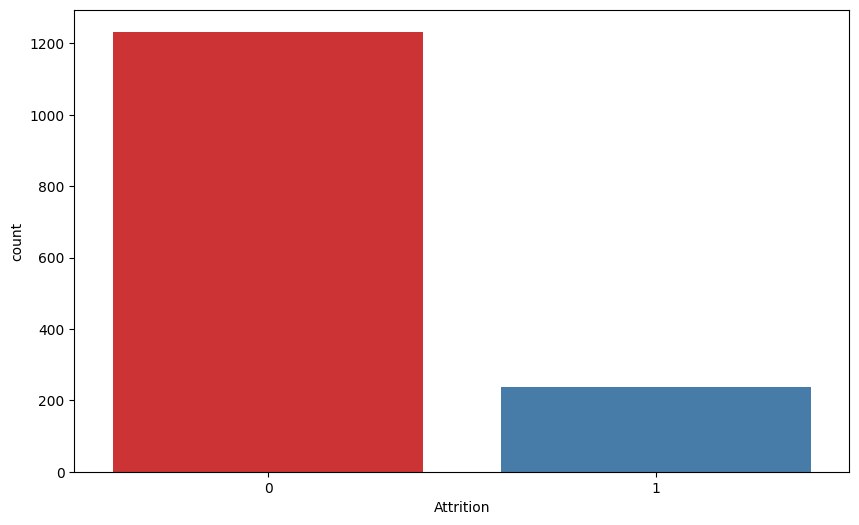

In [34]:
# target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df, palette='Set1')   

We analysed that Target column is highly imbalanced, therefore need to balance the data usiing statistical method. imbalanced data create imbalanced learning especially for case to predict cancer and fraud, which usually infrequent. it can predict every case as NO CANCER and be 99% accurate. but that doesnt means problem is solved.

-----------------------------------------------------------------------------------------------------------------------------------------------

**BUSINESS CASE**

**Executive Summary**

- In today's post-pandemic workforce, employee retention has emerged as one of the top concerns for organizations globally. According to Meritt Recruitment, citing data from the Work Institute, the global employee turnover rate climbed to around 20% in 2024, up from 18% in 2023. This increase underscores the challenges organizations encounter in maintaining employee retention. Understanding the factors that drive employee attrition is critical for especially for HR departments to develop data-driven retention strategies. High attrition leads to increased recruitment and training costs, productivity loss, and disruption in team dynamics. 
This analysis aims to investigates the relationship between employee attrition and key influencing factors such as work-related features, compensation, demographics and career trajectory. By uncovering patterns in these variables, I aim to identify high-risk employees, understand root causes of turnover, and recommend actionable retention strategies.

**Objective**

- The primary goal of this analysis is to gain actionable insights of  how different employee attributes and workplace factors influence the likelihood of attrition.

-------------------------------------------------------------------------------------------------------------------------------------

**DATA SCIENCE QUESTIONS**

**Exploratory analysis**

1. What are the patterns and relationships among work-related factors for Gen Z employees, including monthly income, work life balance, job satisfaction, environment satisfaction, relationship satisfaction, distance from home, years at company and their connection to attrition?

2. Which specific departments and job roles are most affected by high attrition rates?

3. What are the overall patterns in attrition across different demographic groups, and how do Gender, Age, and MaritalStatus interact with WorkLifeBalance?

**Descriptive analysis**

4. What are the average MonthlyIncome, PercentSalaryHike, overtime for employees with and without attrition? 

5. What are the distributions of EnvironmentSatisfaction, RelationshipSatisfaction, and JobInvolvement for employees across various job roles and departments?
give code for this


**Predictive analysis**

6. How do DailyRate, DistanceFromHome, JobInvolvement, JobLevel, MonthlyIncome, NumCompaniesWorked, OverTime status, PercentSalaryHike, PerformanceRating, TotalWorkingYears, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and BusinessTravel frequency influence employee attrition?


**Inferential analysis**

7. Is there a statistically significant difference in JobLevel, YearsAtCompany, Training Times Last Year, YearsatCompany, Years Since Last Promotion between employees who left and those who stayed? 

**Causal analysis**

8. How does improved WorkLifeBalance and reduced OverTime causally affect attrition among employees with high DistanceFromHome? (understand relationship demographic and workload)

**Mechanistic analysis**

9. What is the mechanism by which BusinessTravel, JobInvolvement, and TrainingTimesLastYear affect the probability of leaving? 


-------------------------------------------------------------------------------------------------------------------------------------

**METHODOLOGY**

Exploratory Analysis

* *Goal: Discover patterns, trends, and relationships in the data.*

Methods:

* *Bar graph, Scatter plots, pair plots*


In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='hot')
plt.title('Attrition by Department')
plt.show()

Question 1

- What are the patterns and relationships among work-related factors for Gen Z employees, including monthly income, work life balance, job satisfaction, environment satisfaction, relationship satisfaction, distance from home, years at company and their connection to attrition?

In [ ]:
# Variable : Monthly income, work life balance, job satisfaction, environment satisfaction, relationship satisfaction, distance from home, years at company, attrition?
# I want to explore the work style patterns of Gen Z, as they are often said to  value work-life balance

# Assuming  the dataset is from 2025, filter Gen Z employees
df['BirthYear'] = 2025 - df['Age']  # Assuming the dataset is from 2025
gen_z = df[(df['BirthYear'] >= 1995) & (df['BirthYear'] <= 2012)]

print(f"Number of Gen Z employees: {len(gen_z)}")
print(f"Total number of employees: {df.shape[0]}")


Number of Gen Z employees: 386
Total number of employees: 1470


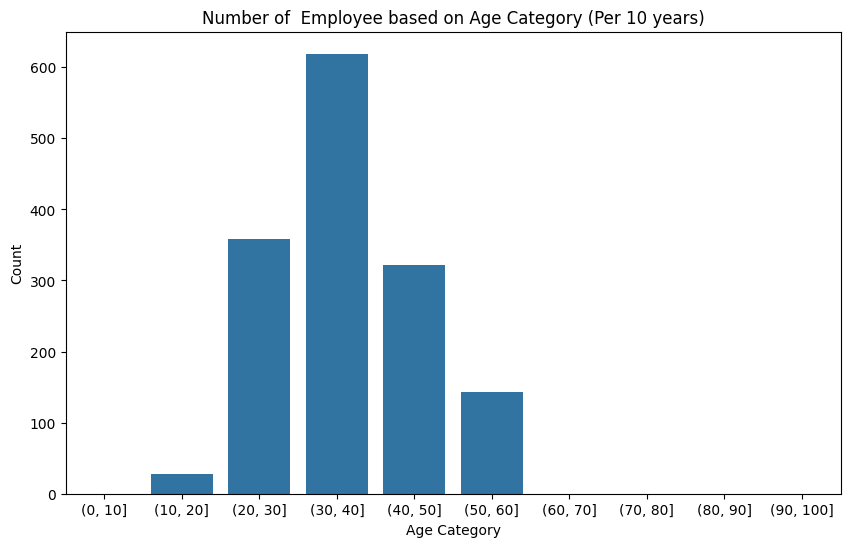

In [ ]:
# Number of Household Head based on Age Category
#Categorize the age per 10 years, dataset dont have column age_category, create it

df['age_category'] =pd.cut(df['Age'], bins = range (0,101,10))

age_counts = df['age_category'].value_counts().sort_index()

plt.figure(figsize= (10,6))
sns.barplot(x=age_counts.index, y=age_counts.values) 
plt.title('Number of  Employee based on Age Category (Per 10 years)')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

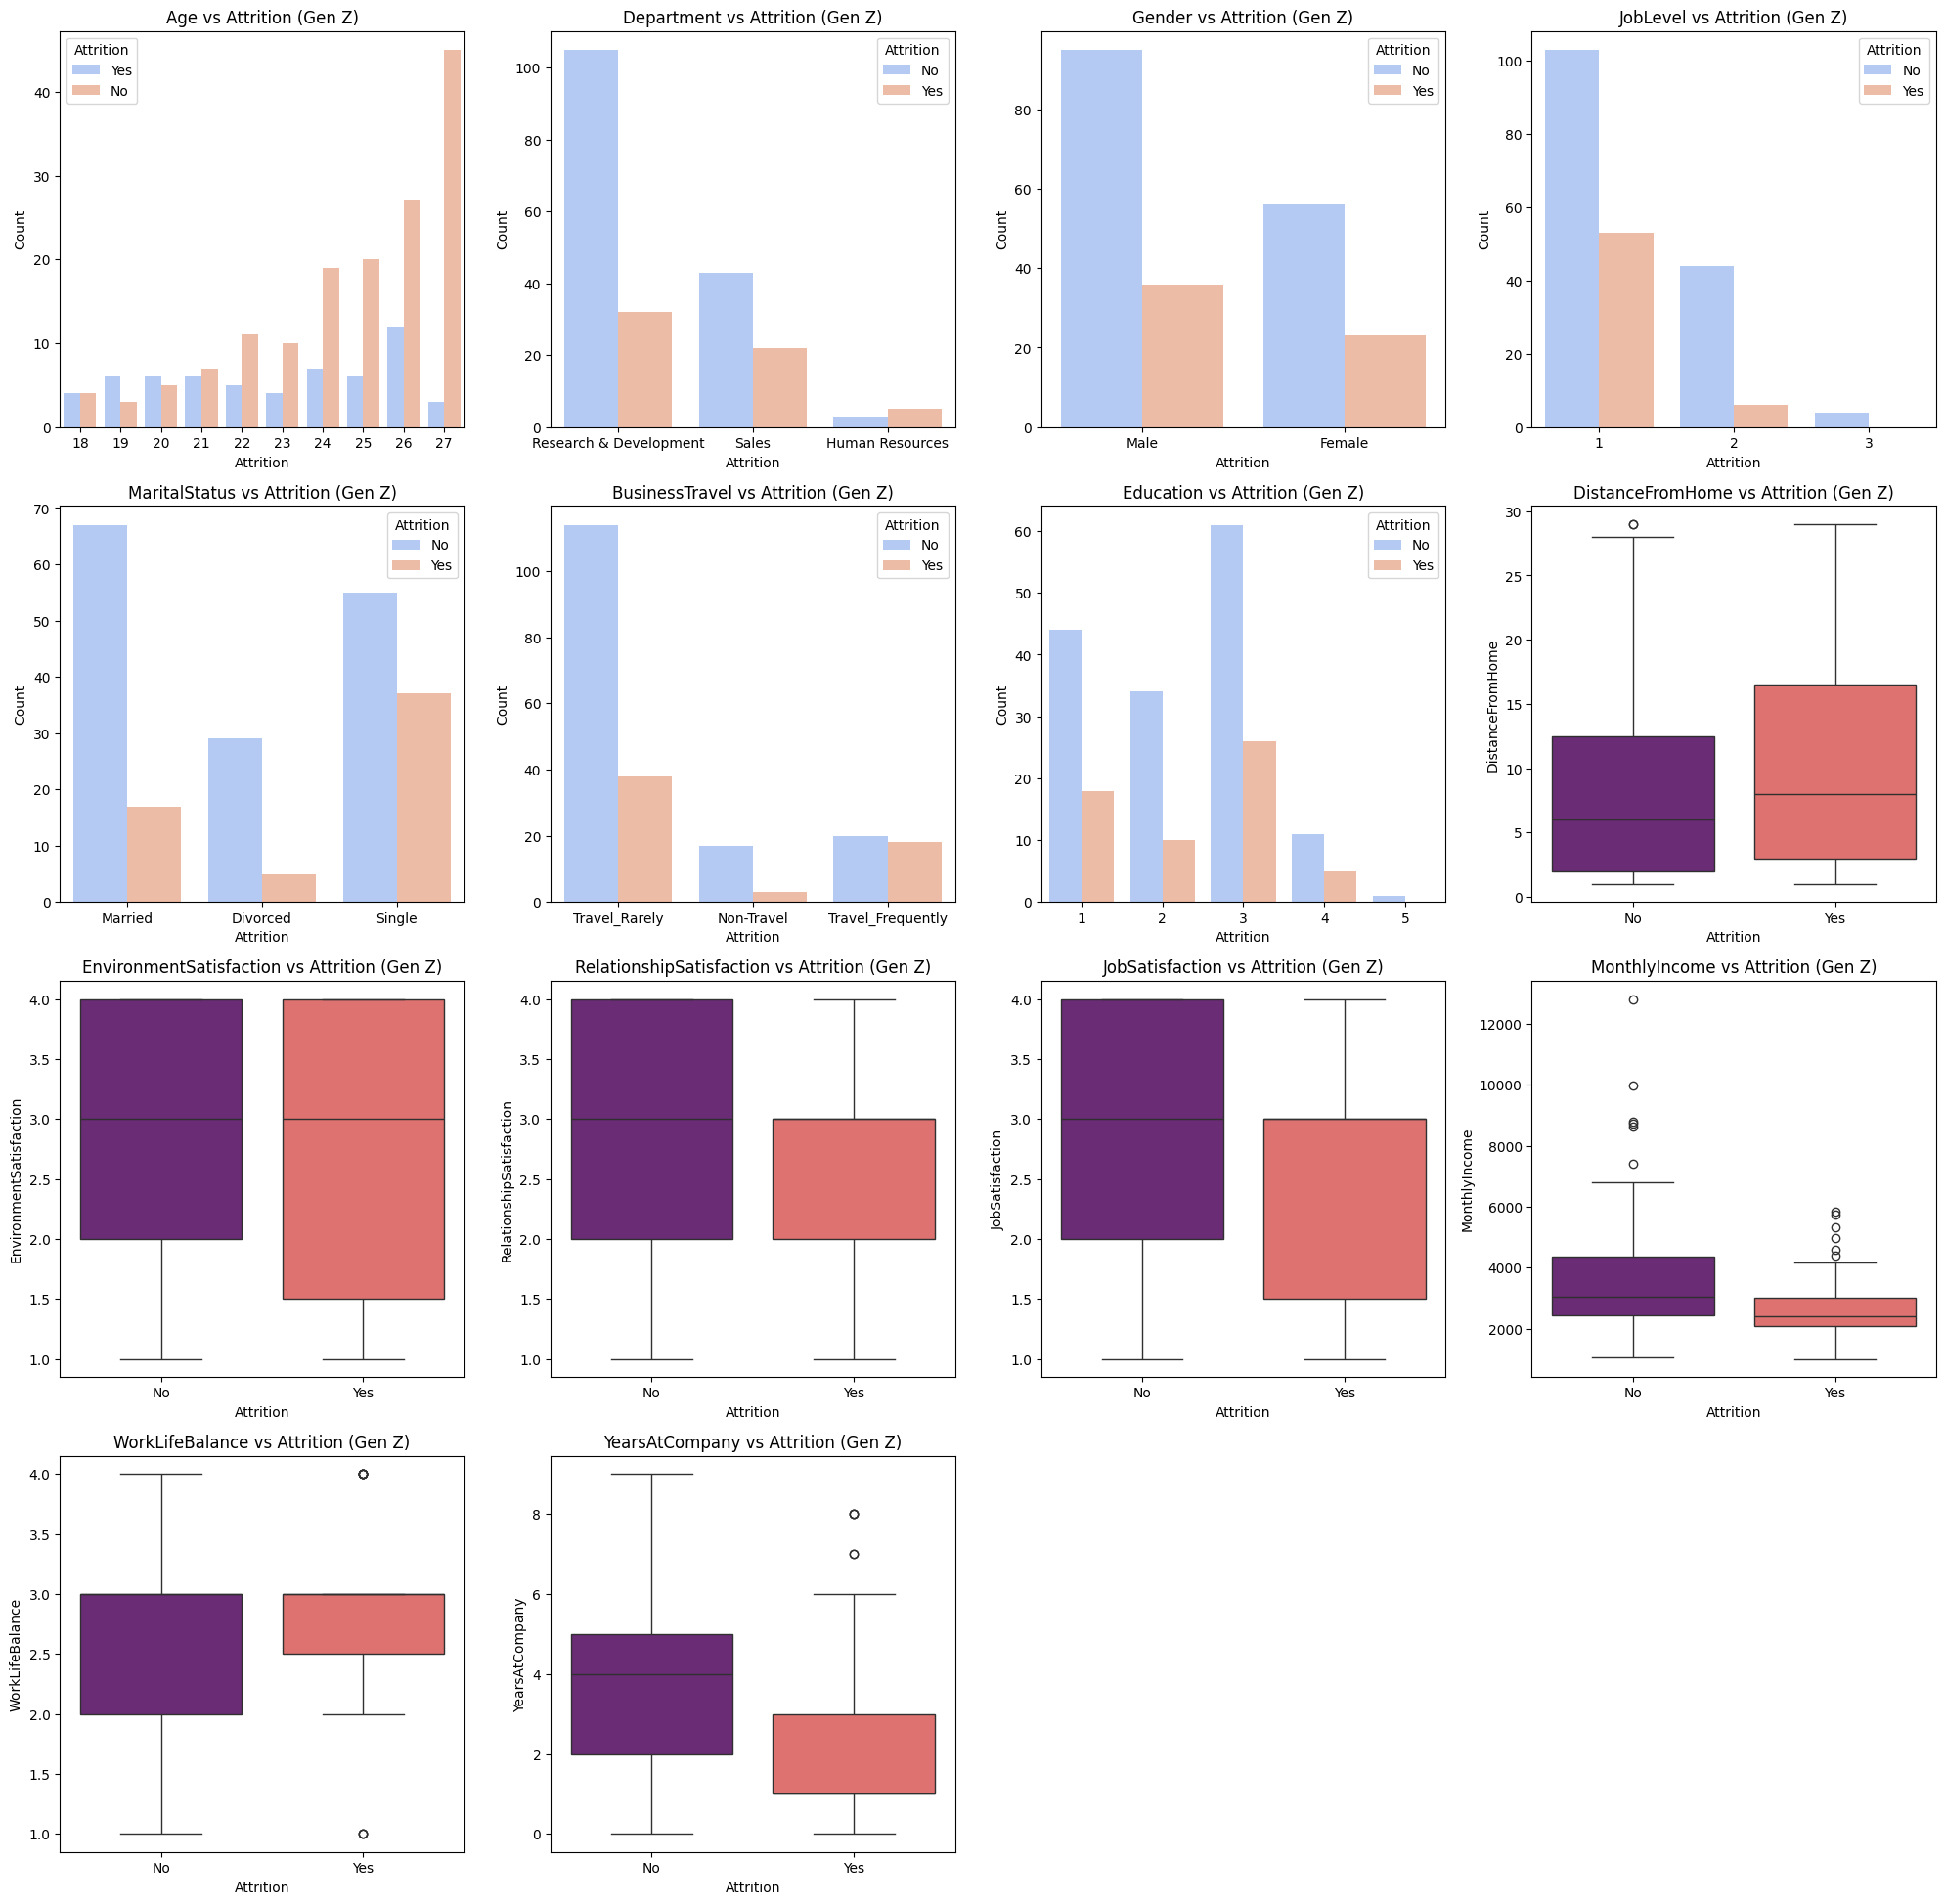

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Gen Z employees (18–27 years old)
gen_z = df[df['Age'].between(18, 27)]  

plt.figure(figsize=(20, 24))

columns_to_analyze = [
    'Age', 'Department', 'Gender', 'JobLevel', 'MaritalStatus',
    'BusinessTravel', 'Education', 'DistanceFromHome', 
    'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction', 
    'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany'
]

# Force  numeric columns to be treated as categorical
categorical_override = ['Age', 'JobLevel', 'Education']

for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(5, 4, i)
    if gen_z[col].dtype in ['int64', 'float64'] and col not in categorical_override:
        sns.boxplot(data=gen_z, x='Attrition', y=col, hue='Attrition', palette='magma', legend=False)
        plt.ylabel(col)
    else:
        sns.countplot(data=gen_z, x=col, hue='Attrition', palette='coolwarm')
        plt.ylabel('Count')
    plt.title(f'{col} vs Attrition (Gen Z)', fontsize=12)
    plt.xlabel('Attrition')

plt.tight_layout()
plt.show()


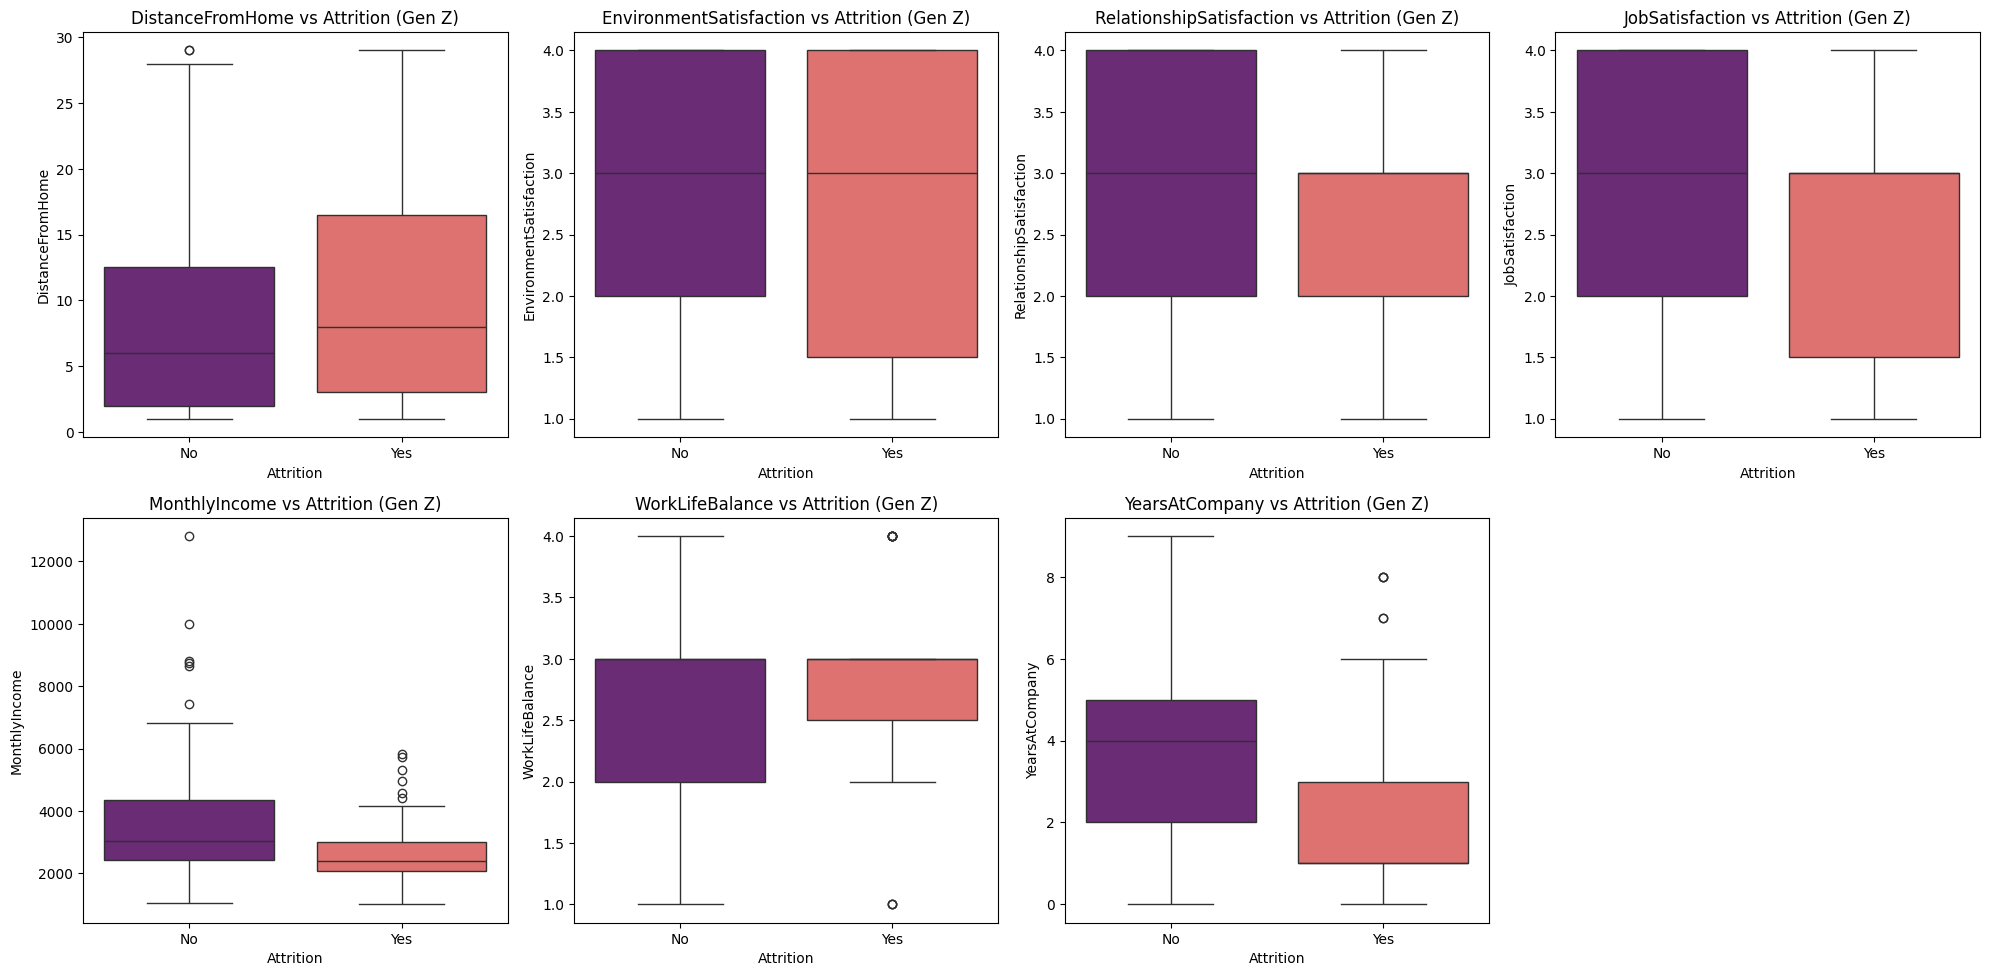

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

gen_z = df[df['Age'].between(18, 27)]  

plt.figure(figsize=(20, 24))

columns_to_analyze = [
    'DistanceFromHome', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction', 
    'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany'
]


for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(5, 4, i)  # 5 rows and 4 columns
    if col in ['DistanceFromHome', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 
               'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany']:  
        sns.boxplot(data=gen_z, x='Attrition', y=col, hue='Attrition', palette='magma', legend=False)
    else:  
        sns.countplot(data=gen_z, x='Attrition', hue=col, palette='coolwarm')
    
    plt.title(f'{col} vs Attrition (Gen Z)', fontsize=12)
    plt.xlabel('Attrition')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


ANALYSIS

**1. Distance From Home vs Attrition**

* Gen Z Employees with longer commutes tend to have higher attrition rates than those who stayed, likely due to dissatisfaction caused by travel time. While they may have more energy than Millennials to handle the distance, the high travel costs can be a dealbreaker, especially when money is tight.


**2. Environment Satisfaction vs Attrition**

* Gen Z employees with environment satisfaction scores between 1.5 to 4 (low-very high satisfaction) tend to leave their jobs, suggesting that environment satisfaction may not be the primary factor driving their decision, given the wide range of scores. The score of those who leaves company and those who stayed doesnt really have differences. However, those with scores between 1.5 and 2 are notably more likely to leave than to stay. This suggests that certain Gen Z in that company places a high priority on feeling comfortable in their workplace, and factors like poorly designed spaces, lack of resources, or an unsupportive culture can significantly contribute to dissatisfaction and attrition.


**3. Relationship Satisfaction vs Attrition**

* Gen Z employees with relationship satisfaction scores between 2 to 3 (medium - high satisfaction) tend to leave their jobs, suggesting that relationship satisfaction may  be the primary factor driving their decision. Most Gen Z in that company places a high value on interpersonal relationships at work. This highlights how much this generation prioritizes a supportive and collaborative atmosphere when considering their long-term commitment to a job. While the relationship is decent, this shows that the workers dont have bond. To address this, HR could focus on activities that bring employees closer together, like team-building exercises or casual social events. Strengthening these bonds could create a more supportive and cohesive environment, encouraging employees to stay longer.


**4. Job Satisfaction vs Attrition**

* Gen Z employees with job satisfaction scores between 1.5 to 3 (low-medium satisfaction) tend to leave their jobs, likely due to factors such as a lack of career growth opportunities, uncompetitive compensation or uninspiring leadership. This generation values meaningful work, development opportunities, and supportive environments, so when these needs aren’t met, they are more inclined to seek opportunities elsewhere.


**5. Monthly Income vs Attrition**

* Gen Z employees with a monthly income range between RM2,000 and RM3,000 are more likely to leave their jobs compared to those earning up to RM4,000. This could be attributed to financial pressures, as this generation often faces rising living costs, student loan repayments, and aspirations for a better quality of life. This trend also highlights the importance of competitive salaries and transparent career progression plans, as Gen Z seeks roles that not only meet their financial needs but also offer growth and stability.

**6. Work-Life Balance vs Attrition**

* Gen Z employees with Work-Life Balance scores between 2.5 and 3 (medium to high satisfaction) tend to leave their jobs, suggesting that while they may not be entirely dissatisfied with their work-life balance, it might not be enough to keep them engaged. 

- It may also reflect that Gen Z has higher expectations for flexibility and personal time, and a medium-to-high score might not fully meet their standards. To retain these employees, HR may need to go beyond basic work-life balance measures, offering more flexible schedules and remote work options

**7. Years at Company vs Attrition**

* Additionally, employees with shorter tenure, especially those with less than two years in a role, show higher attrition rates than those stayed. This could be because newer employees often struggle to  fully grasp the company culture or feel their expectations for career progression and job satisfaction aren’t being met. For Gen Z, this period is crucial for evaluating whether a role aligns with their values and goals, and if it doesn’t, they are likely to move on.

- To address this, companies should focus on improving onboarding processes, offering clear career pathways, and enhancing engagement during the early stages of employment to retain fresh talent.

**Summary**

- Gen Z employees tend to leave due to long commutes, limited career growth, financial pressures, and lack of strong workplace relationships, even with medium-to-high satisfaction in areas like work-life balance and environment. Addressing these factors with flexible work options, competitive pay, and better engagement can improve retention

- According to to researched made by Racolța-Paina & Irini (2025), all the interviewed HR specialists believed that Generation Z members have unrealistic wage expectations,especially if consider those without working experience seeking their first employment contract. According to them, besides wage, among the most expected elements from the workplace include flexible work program, transparent communication, other salary benefits, the opportunity to
advance in the company and access to challenging projects

-------------

Question 2

- Which specific departments and job roles are most affected by high attrition rates?

Unique values in Attrition column: ['Yes' 'No']


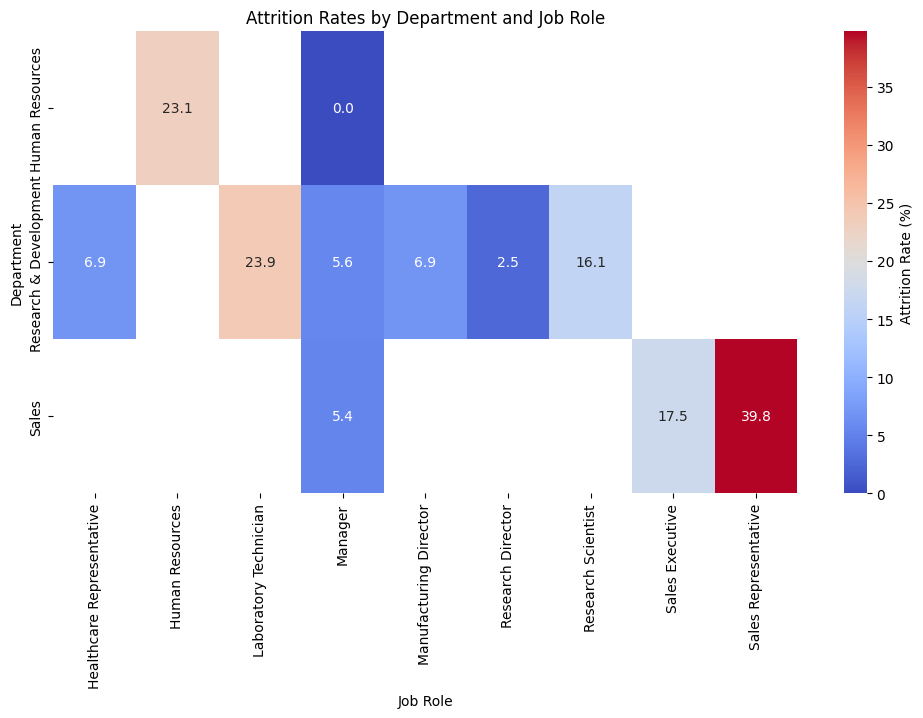

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Unique values in Attrition column:", df['Attrition'].unique())

attrition_grouped = (
    df.groupby(['Department', 'JobRole'])['Attrition']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
if 'Yes' in attrition_grouped.columns:
    attrition_rates = attrition_grouped['Yes'] * 100  
elif 1 in attrition_grouped.columns:
    attrition_rates = attrition_grouped[1] * 100  
else:
    raise ValueError("Unexpected values in the Attrition column. Please check the data.")

plt.figure(figsize=(12, 6))
sns.heatmap(attrition_rates.unstack(), annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Attrition Rate (%)'})
plt.title("Attrition Rates by Department and Job Role")
plt.xlabel("Job Role")
plt.ylabel("Department")
plt.show()


**ANALYSIS**


- To gain a clearer understanding, the Attrition Rate graph was examined, where attrition is measured as the percentage of employees who left within each job role. 

- This analysis reveals that Sales Representative under Sales Department holds the highest attrition rate in the company approaching 40%. 40% is a large percentage, showing that there might be trend in sales representative experience that make them quitting. It is followed by Laboratory Technician, Human Resources, Sales Executive, Research Scientist which show significantly higher attrition rates compared to other roles. 

- In contrast, positions like Manufacturing Director, Healthcare Representative,  Manager, and Research Director show very low attrition rates, suggesting these roles are more stable.

- The analysis showed that Department doesnt affect attrition, as top job role by attrition (Sales Representative Sales Representative, Laboratory Technician, Human Resources) are in different department.

--------

Question 3

- What are the overall patterns in attrition across different demographic groups, and how do Gender, Age, and MaritalStatus interact with WorkLifeBalance?

C:\Users\User\AppData\Local\Temp\ipykernel_20896\1403795172.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=demographic_groups, x="WorkLifeBalance", y="AttritionRate", hue="Gender", ci=None)


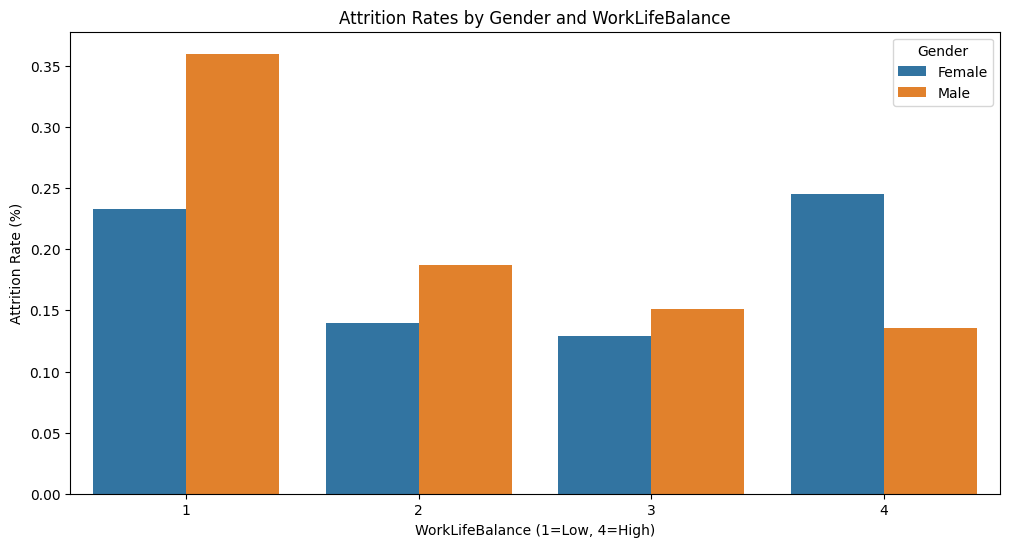

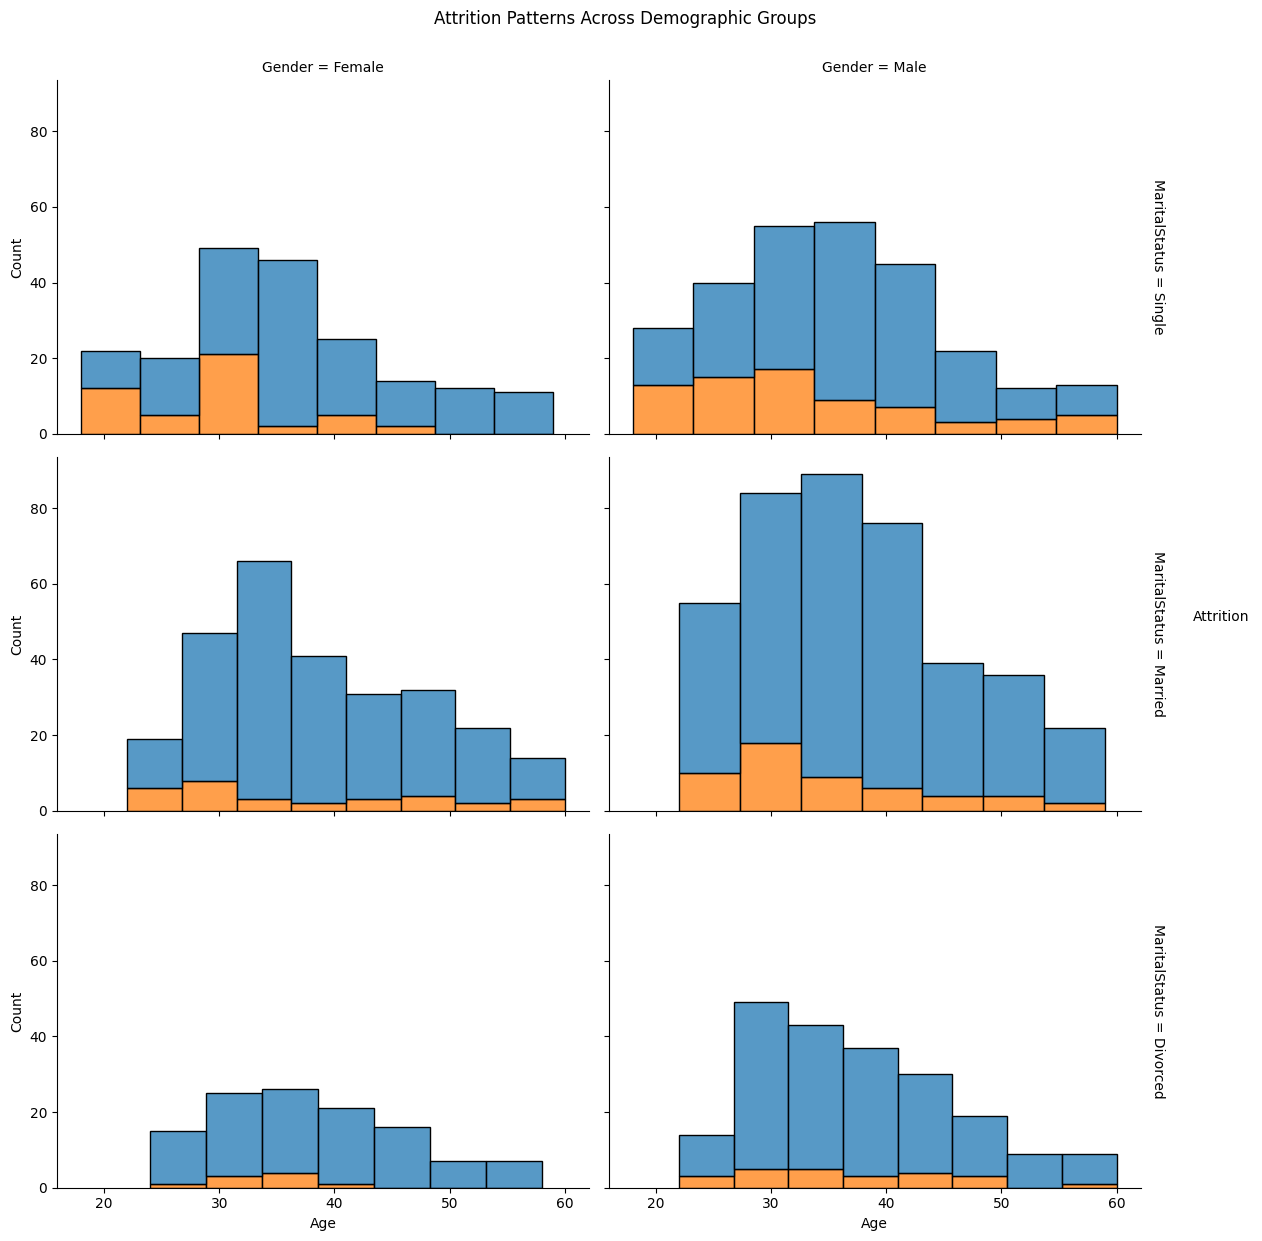

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition is encoded as binary (e.g., 0 = No, 1 = Yes)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

demographic_groups = (
    df.groupby(['Gender', 'WorkLifeBalance'])['Attrition']
    .mean()
    .reset_index(name="AttritionRate")
)

plt.figure(figsize=(12, 6))
sns.barplot(data=demographic_groups, x="WorkLifeBalance", y="AttritionRate", hue="Gender", ci=None)
plt.title("Attrition Rates by Gender and WorkLifeBalance")
plt.xlabel("WorkLifeBalance (1=Low, 4=High)")
plt.ylabel("Attrition Rate (%)")
plt.legend(title="Gender")
plt.show()

# FacetGrid for deeper interaction of Age and MaritalStatus with Attrition
g = sns.FacetGrid(df, col="Gender", row="MaritalStatus", margin_titles=True, aspect=1.5, height=4)
g.map_dataframe(sns.histplot, x="Age", hue="Attrition", multiple="stack", binwidth=5)
g.set_axis_labels("Age", "Count")
g.add_legend(title="Attrition")
g.fig.suptitle("Attrition Patterns Across Demographic Groups", y=1.03)
plt.show()

ANALYSIS

- Poor WorkLifeBalance (Rating 1 = Low) has the highest attrition rates across all range of worklifebalance, particularly for Male employees (36%) compared to Female employees (23%). As WorkLifeBalance improves (ratings 2 to 4), attrition rates decline for both genders.

- Males employees show the steepest drop in attrition as WorkLifeBalance improves, indicating they are more sensitive to poor work-life conditions. According to (Li et al., 2024), Organizations that prioritize work-life balance foster greater employee loyalty, leading to higher retention rates. The better the work life balance for them, the lower they are likely to leave the company.

- Sursprisingly, female attrition rises slightly again at the highest WorkLifeBalance level (4), surpassing male attrition. This suggests that while work-life initiatives may generally reduce turnover, they may not be equally effective across genders. For female employees, this  could point to other underlying issues such as limited career advancement opportunities, lack of challenging work, or external life transitions 

- Therefore HR should Focus efforts on improving WorkLifeBalance particularly for Male employees in poor conditions.

- Further investigation is needed why Females with high WorkLifeBalance (rating 4) = Best** are still leaving—could suggest external factors or career growth dissatisfaction.

ANALYSIS 2

- Younger employees (range age 30) show higher attrition rates (orange graph) across all demographic groups. Single males, single females and married man show the highest overall attrition in the 30 age range  across all marital status.

-  Across marital status, single worker showed the highest attrition. Married employee show lower attrition than single, suggesting that family responsibilities may anchor retention. Divorced employees show lowest attrition across age groups with no sharp spikes.

- Younger, single employees are most likely to leave, especially early in their careers. Married employees aged 35–45 are most stable, possibly due to financial and family commitments.

- Married female employee, divroced male and female employee showed overall lowest attrition across age and marital status. For divorced employees, this may be due to increased financial responsibilities, as they might be sole breadwinners and more dependent on stable income and job security.For married females, the low attrition could be linked to a desire for stability to support household routines

- Gender wise, it appears that a lot of males likely to leave the company.

- For HR recommendations, they should consider tailor programs to life stage and marital status like childcare support for married males, career coaching for single males and female.



-------------------------------------------------------------------------------------------------------------------------------------

Descriptive Analysis

* *Goal: Understand what happened by summarizing and organizing data.*

Methods:

* *Data Aggregation: Combine data to observe trends or patterns.*

* *Summary Statistics: Mean, median, mode, variance, and standard deviation.*

* *Frequency Distribution: Visualize how often values occur (e.g., histograms).*

* *Cross-Tabulation: Compare relationships between categorical variables.*

* *Trend Analysis: Identify patterns or changes over time.*

Question 4

- What are the average MonthlyIncome, PercentSalaryHike, overtime for employees with and without attrition? 

In [22]:
df.columns = df.columns.str.strip()

print(df[['Attrition', 'OverTime']].head())
print(df['Attrition'].unique())


   Attrition OverTime
0          1      Yes
1          0       No
2          1      Yes
3          0      Yes
4          0       No
[1 0]


In [23]:
print(df.columns)
print(df[['Attrition', 'MonthlyIncome', 'PercentSalaryHike', 'OverTime']].head())
print(df[['MonthlyIncome', 'PercentSalaryHike']].isnull().sum())


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BirthYear', 'age_category'],
      dtype='object')
   Attrition  MonthlyIncome  PercentSalaryHike OverTime
0          1           5993                 11      Yes
1          0           5130                 23       No
2          1           2090                 15      Yes
3          0           2909         

Average MonthlyIncome and PercentSalaryHike by Attrition:
           MonthlyIncome  PercentSalaryHike
Attrition                                  
0            6832.739659          15.231144
1            4787.092827          15.097046

OverTime % by Attrition:
OverTime       0      1
Attrition              
0          76.56  23.44
1          46.41  53.59


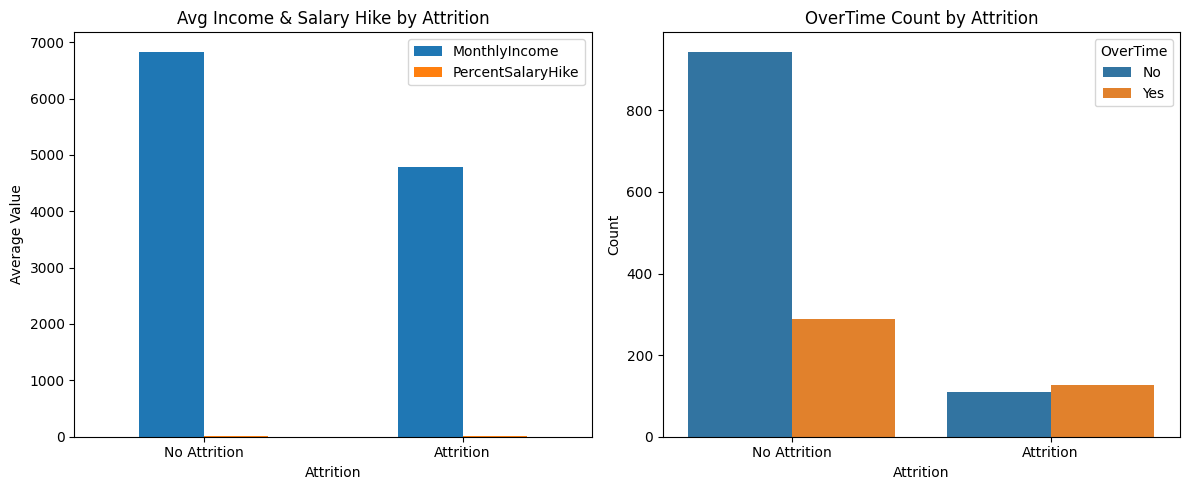

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_values = df.groupby('Attrition')[['MonthlyIncome', 'PercentSalaryHike']].mean()
print("Average MonthlyIncome and PercentSalaryHike by Attrition:")
print(avg_values)

overtime_counts = pd.crosstab(df['Attrition'], df['OverTime'].map({'No': 0, 'Yes': 1}))

overtime_percent = overtime_counts.div(overtime_counts.sum(axis=1), axis=0) * 100
overtime_percent = overtime_percent.round(2)

print("\nOverTime % by Attrition:")
print(overtime_percent)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
avg_values.plot(kind='bar', ax=plt.gca())
plt.title('Avg Income & Salary Hike by Attrition')
plt.xticks([0, 1], ['No Attrition', 'Attrition'], rotation=0)
plt.ylabel('Average Value')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Attrition', hue='OverTime')
plt.title('OverTime Count by Attrition')
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.ylabel('Count')

plt.tight_layout()
plt.show()


ANALYSIS


| Attrition | MonthlyIncome (avg) | PercentSalaryHike (avg) | OverTime (% of Employees) |
| --------- | ------------------- | ----------------------- | ------------------------- |
| No        | 6832.74             | 15.23                   | 23.4%                     |
| Yes       | 4787.09             | 15.10                   | 53.6%                     |


- Employees who stayed earn significantly more on average (6833) than those who left (4787). In the bar chart, income is clearly lower for the those who left, indicating compensation is a strong attrition factor.

- The difference is minimal for percentage salary hike. 15.23% (No Attrition) vs. 15.10% (Yes Attrition). This shows salary hikes have little to no direct influence on attrition. 

- Massive contrast where overTime is twice as common among employees who left (53.6%) compared to those who stayed (23.4%) “Yes” group has nearly maximum OverTime, suggesting a direct correlation between high overtime and employee attrition.


- In summary, This indicates lower base salaries are a critical driver of attrition. Employees with lower income are more likely to leave, potentially seeking better offers. The OverTime factor is the strongest predictor of attrition in this data. Overworked employees are more than twice as likely to leave.This indicates burnout, work stress, and poor work-life balance are major drivers.

- For HR, consider benchmarking salaries against industry standards to remain competitive or introduce compensation adjustments based on skill, contribution, or tenure. Next, closely monitor departments or roles with excessive OverTime and promote work-life balance through workload redistribution, automation, or hiring.


--------

Question 5

- What are the distributions of EnvironmentSatisfaction, RelationshipSatisfaction, and JobInvolvement for employees across various job roles and departments?

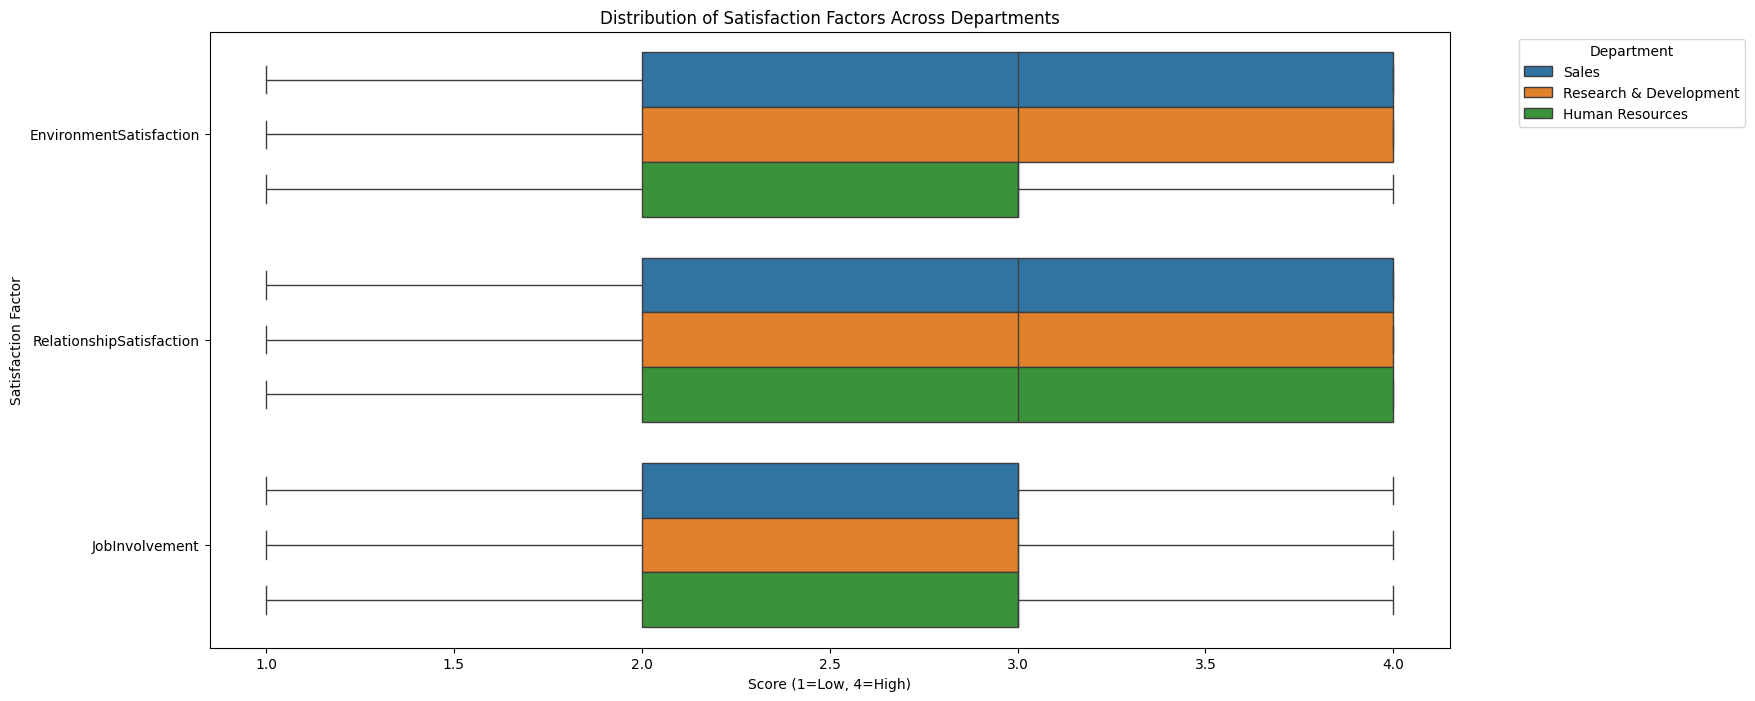

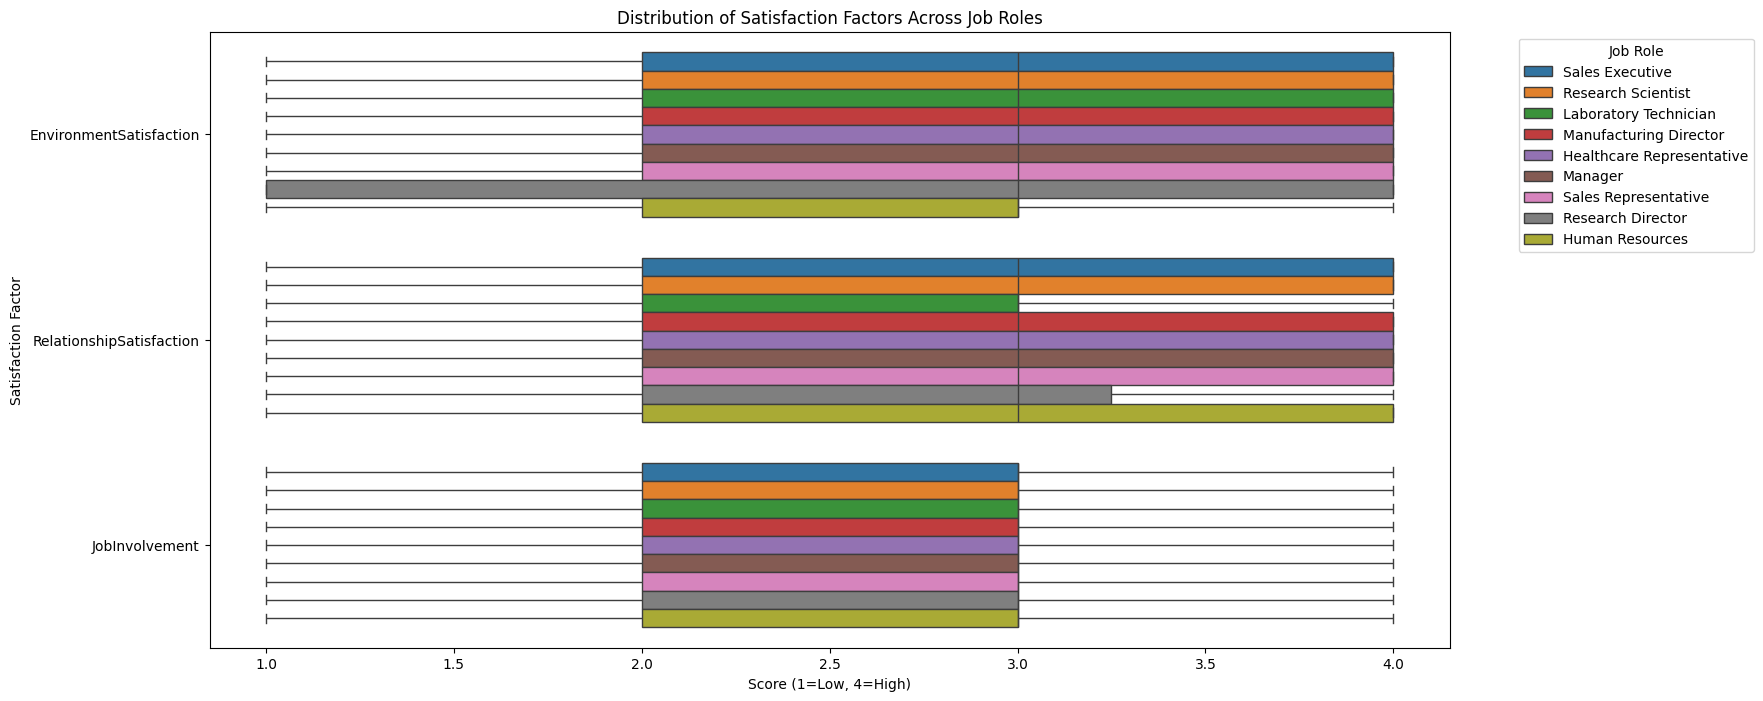

In [25]:
satisfaction_factors = df[['EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement', 'JobRole', 'Department']]

melted_satisfaction = satisfaction_factors.melt(id_vars=['JobRole', 'Department'], 
                                                value_vars=['EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement'], 
                                                var_name='SatisfactionFactor', 
                                                value_name='Score')

plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_satisfaction, x='Score', y='SatisfactionFactor', hue='Department', orient='h')
plt.title("Distribution of Satisfaction Factors Across Departments")
plt.xlabel("Score (1=Low, 4=High)")
plt.ylabel("Satisfaction Factor")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_satisfaction, x='Score', y='SatisfactionFactor', hue='JobRole', orient='h')
plt.title("Distribution of Satisfaction Factors Across Job Roles")
plt.xlabel("Score (1=Low, 4=High)")
plt.ylabel("Satisfaction Factor")
plt.legend(title="Job Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ANALYSIS

**Chart 1: Satisfaction Factors by Departments**


- Sales and Research & Development departments have high scores (satisfaction level 3 to 4).

- Human Resources departments has a  slightly lower average, with some distribution at score 2 to 3. This may indicate a less favorable working environment in HR compared to others.

- All departments show high relationship satisfaction, mostly around score 4. This indicates a positive, friendly work cultur

- Scores are centered around 2 to 3 for job involvement in all departments, showing average to moderately high involvement. It suggest that not many employees are highly involved or fully engaged in their job. This is likely to be fault in organisation managment since most employees share similar satisfaction.


**Chart 2: Satisfaction Factors by Job Roles**

- Most job roles have a strong clustering around score 3 and 4, indicating a generally high level of environment satisfaction.

- Sales Executive, Healthcare Representative, Manager, and Manufacturing Director show higher levels of satisfaction** (more concentration at 4).

- Research Director shows a slightly more spread distribution, suggesting variability in satisfaction.

- Human resources shows low environment satisfaction levels, indicating there is problem in underlying issues with the physical or psychological work environment in that job role.


- The distribution of relationship satisfaction is generally skewed toward higher scores (3 and 4) across most roles.

- However Laboratory Technician shows a visible dip (2 to 3), indicating slightly lower relationship satisfaction compared to others. Employees in this role may feel less connected or friendly with each other compared to other role.

- Research Director shows a more even spread, suggesting mixed experiences in workplace relationships. Some content with their relationship, some might have personal issues

- Majority of the roles have a dominant score of 2 to 3, indicating moderate involvement.No roles show a significant clustering at 1 or 2, which is positive, but there is a room for imporvement


Summary

- Environment Satisfaction is generally high, but attention is needed in HR and Lab Technicians where environment perception is more mixed.

- Relationship Satisfaction is strong across the board**, though Research Directors and HR staff may benefit from team-building or culture-improving interventions.

- Job Involvement is moderate. HR could consider engagement strategies like role enrichment or recognition to improve involvement in departments.

- Among these three variable, relationship satisfaction is this organisation is not a porblem, the are majorily riendly with each other, but job involvement is the problem could be improved.

-----------------------------------------------------------------------------------------------------------------------------------------------

Predictive Analysis

* *Goal: Forecast future outcomes using historical data.*

Methods:

* *Regression models: Linear, logistic*

* *Classification models: Decision trees, SVM, neural networks*

* *Time series forecasting: ARIMA, LSTM*

* *Model validation: Cross-validation, ROC-AUC*

 Question 6

* How do DailyRate, DistanceFromHome, JobInvolvement, JobLevel, MonthlyIncome, NumCompaniesWorked, OverTime status, PercentSalaryHike, PerformanceRating, TotalWorkingYears, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and BusinessTravel frequency influence employee attrition?



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       309
           1       0.63      0.20      0.31        59

    accuracy                           0.85       368
   macro avg       0.75      0.59      0.61       368
weighted avg       0.83      0.85      0.82       368

Accuracy Score: 0.8532608695652174


C:\Users\User\AppData\Local\Temp\ipykernel_20896\487620710.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


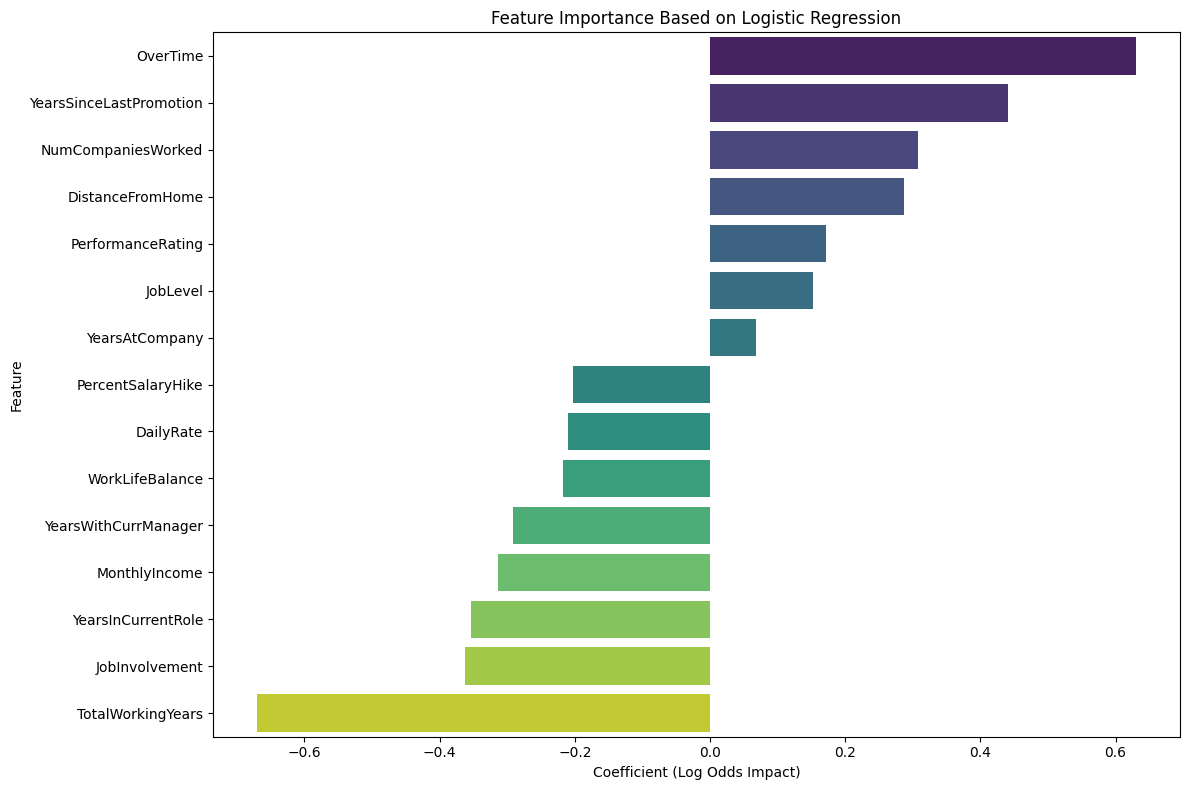

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

for col in df.columns:
    if isinstance(df[col].iloc[0], pd._libs.interval.Interval):
        df[col] = df[col].apply(lambda x: x.mid)

target = 'Attrition'
features = [
    'DailyRate', 'DistanceFromHome', 
    'JobInvolvement', 'JobLevel', 'MonthlyIncome',
    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
    'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',

]

features = [col for col in features if col in df.columns]

label_encoder = LabelEncoder()
if target in df.columns:
    df[target] = label_encoder.fit_transform(df[target])
if 'OverTime' in df.columns and df['OverTime'].dtype == 'object':
    df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

scaler = StandardScaler()
X = df[features]
y = df[target]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

feature_importance = pd.Series(model.coef_[0], index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title('Feature Importance Based on Logistic Regression')
plt.xlabel('Coefficient (Log Odds Impact)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


ANALYSIS

- We found found at above analysis overtime might be one of the problem in this organisation, but this feature importance shows that it is the biggest reason of  attrition. OverTime  is the strongest predictor of attrition. Excessive overtime may cause burnout or dissatisfaction, prompting employees to seek better work-life balance elsewhere.

- Years Since Last Promotion. Employees who feel stuck in their careers are more likely to leave, highlighting the importance of career development.

- NumCompaniesWorked. Employees who have worked in many companies previously are also more likely to leave.This may indicate a pattern of job-hopping or a lower threshold for dissatisfaction.

- DistanceFromHome moderately affects attrition; employees who live farther away are slightly more likely to quit, possibly due to commute stress.

- PerformanceRating and JobLevel show smaller positive contributions, implying that even high performers or senior staff may consider leaving, perhaps due to mismatched expectations or job dissatisfaction.

- YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager. longer tenure doesn’t necessarily reduce attrition.

- PercentSalaryHike, DailyRate, MonthlyIncome. while compensation matters, it shows limited effect in retaining employees.

- TotalWorkingYears. this feature is negatively associated with attrition, indicating that more experienced employees are slightly more stable, but its effect is not dominant.


--------------

Inferential Analysis

- Goal: Draw conclusions about a population based on sample data.

Methods:

- Hypothesis testing: t-test, chi-square test, ANOVA

- Confidence intervals

- p-values and statistical significance

- Bootstrapping for estimation

Question 7

- Is there a statistically significant difference in JobLevel, YearsAtCompany, Training Times Last Year, YearsatCompany, Years Since Last Promotion between employees who left and those who stayed? (to see career progression and development, to ana;lyse growth opptunities as factor)

In [27]:
print(df['Attrition'].value_counts())


Attrition
0    1233
1     237
Name: count, dtype: int64


In [28]:
# Since the attrition and non attrtiion value are too imbalanced, i cant use t-test, i will use mann-whitney u test
from scipy.stats import mannwhitneyu

features = ['JobLevel', 'YearsAtCompany', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']

# Perform Mann-Whitney U tests
for feature in features:
    stayed = df[df['Attrition'] == 0][feature]
    left = df[df['Attrition'] == 1][feature]
    stat, p_val = mannwhitneyu(stayed, left, alternative='two-sided')
    print(f"{feature}: U-stat={stat:.3f}, p-value={p_val:.3f}")

JobLevel: U-stat=187491.500, p-value=0.000
YearsAtCompany: U-stat=189639.000, p-value=0.000
TrainingTimesLastYear: U-stat=157435.500, p-value=0.047
YearsSinceLastPromotion: U-stat=157847.000, p-value=0.041


ANALYSIS

- Yes, there is a statistically significant difference in JobLevel, YearsAtCompany, TrainingTimesLastYear, and YearsSinceLastPromotion between employees who stayed and those who left.

- Based on the Mann-Whitney U test results, The p-value (0.000) for JobLevel indicates a highly significant difference. Job levels vary significantly between those who left and those who stayed, suggesting that job level influences attrition.

- The p-value (0.000) of YearsAtCompany also shows a highly significant difference. Employees’ tenure at the company plays a role in attrition, with either shorter or longer tenures contributing to employees' decisions to leave.

- The p-value (0.047) of TrainingTimesLastYear suggests a marginally significant difference. Training opportunities are slightly more frequent among employees who stay, indicating their potential role in retention.

- The p-value (0.041) of YearsSinceLastPromotion shows a significant difference. Employees who feel stagnant or have waited too long for a promotion are more likely to leave.


- The analysis confirms that factors related to career progression and development opportunities are statistically significant in differentiating employees who stay from those who leave. These findings underscore the importance of addressing these factors to improve employee retention and reduce attrition.

---------

Causal Analysis

- Goal: Identify cause-and-effect relationships.

Methods:

- Randomized Controlled Trials (RCTs)

- Causal inference techniques: DiD, Propensity Score Matching

- Instrumental Variables for endogeneity

- Directed Acyclic Graphs (DAGs)

Question 8

- How does improved WorkLifeBalance and reduced OverTime causally affect attrition among employees with high DistanceFromHome? (understand relationship demographic and workload)

In [29]:
import pandas as pd
import statsmodels.api as sm

high_distance = df[df['DistanceFromHome'] > df['DistanceFromHome'].median()].copy()

X = high_distance[['WorkLifeBalance', 'OverTime']]
y = high_distance['Attrition']

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.454926
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  695
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Jul 2025   Pseudo R-squ.:                 0.06417
Time:                        16:26:27   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -337.85
Covariance Type:            nonrobust   LLR p-value:                 3.846e-10
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9075      0.391     -2.323      0.020      -1.673      -0.142
WorkLifeBalanc

ANALYSIS

- The logistic regression output shows that both WorkLifeBalance and OverTime significantly affect attrition.

- OverTime (coef = +1.2196, p < 0.001). This large positive coefficient indicates that working overtime increases the odds of attrition. Employees who work overtime are much more likely to leave. The effect is statistically significant, confirming that overtime is a major contributing to attrition.

- WorkLifeBalance (coef = -0.3698, p = 0.008). This negative coefficient shows that better work-life balance significantly reduces the odds of attrition. Employees who rate their work-life balance more favorably are less likely to leave.

- Constant (Intercept = -0.9075). Suggests that  when both variables are at zero, the base probability of attrition is already relatively low. 

- Causal Interpretation with High DistanceFromHome Context: Now, if someone lives far from work, they already spend a lot of time traveling. If they also have overtime and poor work-life balance, it makes their day even harder. This can make them feel unhappy and push them to leave the company.

- Thus, reducing overtime and improving work-life balance would directly lower attrition rates, especially for employees with high commuting distances. 

-------

Mechanistic Analysis

- Goal: Understand the exact mechanisms and processes driving the outcomes.

Methods:

- Mathematical modeling: Equations, simulations

- Domain-specific models: Biological, physical system simulations

- Systems modeling and engineering models

Question 9

- What is the mechanism by which BusinessTravel, JobInvolvement, and TrainingTimesLastYear affect the probability of leaving? (to find organitional features, work engagement,cdevelopment affect attrition)


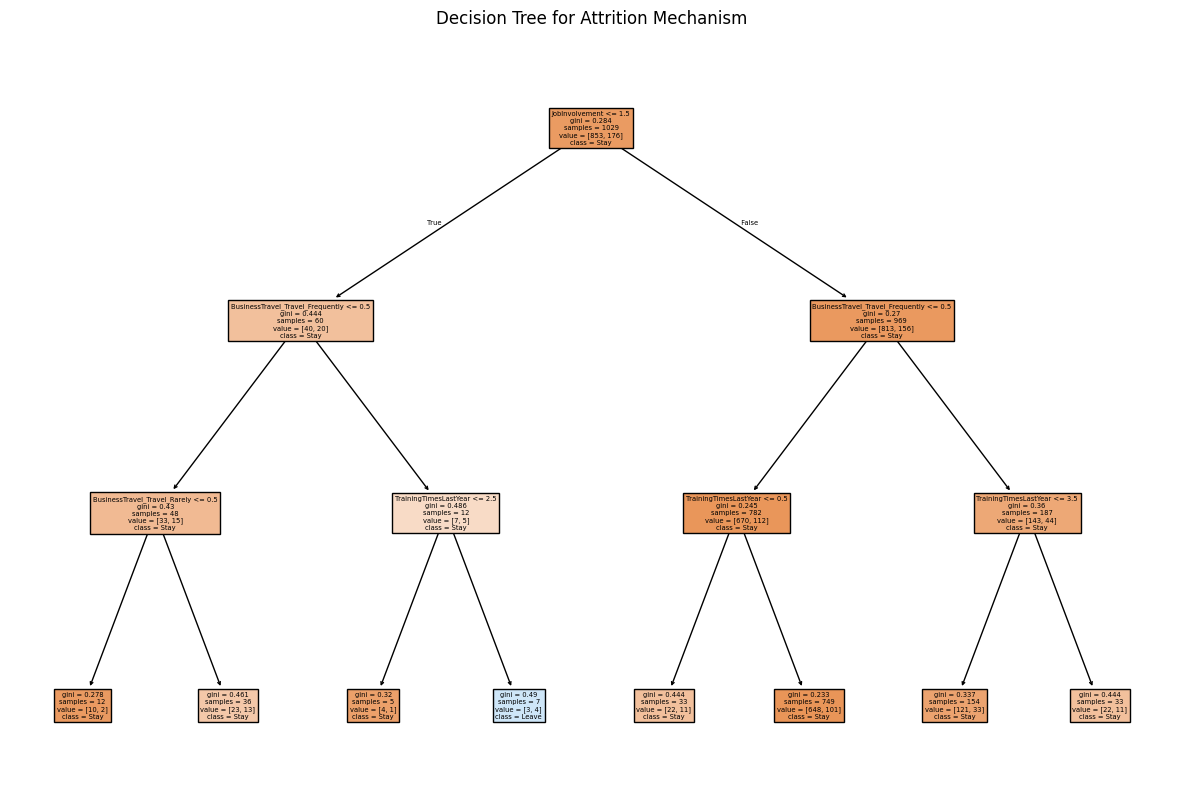

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

X = df[['BusinessTravel', 'JobInvolvement', 'TrainingTimesLastYear']]
X = pd.get_dummies(X, drop_first=True) 
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Stay", "Leave"], filled=True)
plt.title("Decision Tree for Attrition Mechanism")
plt.show()


ANALYSIS

- The decision tree shows how work engagement, development efforts, and travel demands impact an employee’s likelihood to leave the company.

- Job Involvement is the first and most important factor  among these three. Employees with low job involvement (score 1 or 2) are more likely to leave. This suggests that when employees feel disconnected or not deeply engaged in their roles, they tend to seek other opportunities. Low involvement often reflects a lack of motivation, unclear job purpose, or low sense of contribution.

- BusinessTravel is another key factor. Employees who travel frequently for work are shown to be more likely to leave. This could be due to travel-related stress, lack of work-life balance, or fatigue. In contrast, those who travel less or occasionally are more likely to stay, indicating that moderate travel is manageable and possibly even desirable, while excessive travel becomes a burden.

- TrainingTimesLastYear also plays a lower role in the attrition mechanism. Employees who received little to no training are at higher risk of leaving. This suggests that a lack of learning and growth opportunities may lead employees to feel stagnant. On the other hand, those who received more frequent training were more likely to stay, indicating that development and support from the organization help improve retention.

- Overall, these three features together show that attrition is closely linked to how engaged employees feel, how supported they are in growing, and whether work demands like travel are manageable.

--------

**SUMMARY**

- Based on the analysis, this large company's primary problem is high employee attrition, particularly in specific job roles like Sales Representatives, Laboratory Technicians, Human Resources, Sales Executives, and Research Scientists. This attrition is driven by a combination of factors.A critical finding is the significant impact of overtime. Employees who work excessive overtime are more than twice as likely to leave, indicating severe burnout and work-life balance issues. This is especially problematic for male employees, who show a steeper decline in attrition as work-life balance improves. The analysis also highlights that lower base salaries are a critical driver of attrition, even more so than salary hikes. Employees earning between RM2,000 and RM3,000 are notably more likely to leave.Furthermore, job involvement is a another factor. Employees with low job involvement (scoring 1 or 2) are significantly more likely to leave, indicating a lack of connection or engagement with their roles. Business travel, especially frequent travel, also contributes to attrition, likely due to stress and an imbalance between work and personal life. Finally, a lack of training and development opportunities contributes to employees feeling stagnant and seeking opportunities elsewhere, particularly for those with less than two years tenure. Years since last promotion also significantly impacts an employee's decision to leave.According to Randstad Malaysia’s Employer Brand Research report, 24% of Malaysian workers believe that a lack of training opportunities and insufficient managerial support are key contributors to employee disengagement and attrition despite 85 per cent of respondents said that upskilling and re-skilling is important to them. Addressing these issues could help companies improve retention by focusing on career development and employee support (Randstad HR Trends 2023).To combat this, HR should implement targeted strategies such as strengthen Career Development. This is a crucial area. Create clear, transparent career pathways with opportunities for growth and promotion.The least problematic area for this company appears to be overall relationship satisfaction among employees. While some roles like Laboratory Technician show a slight dip, generally, employees report high satisfaction with their relationships at work. This indicates a positive and friendly work culture where individuals mostly get along

**RESOURCES**

1. Li Qi, Cheok Mui Yee, Benjamin Chan Yin Fah, The Role of Work-Life Balance in Enhancing Employee Loyalty. Accounting and Corporate Management (2024) Vol. 6: 43-47. DOI: http://dx.doi.org/10.23977/acccm.2024.060106.

2. Merritt Recruitment. (2024, July). Staff retention in 2024: Global stats and trends. Merritt Recruitment. Retrieved from https://www.merrittrecruitment.com/blog/2024/07/staff-retention-in-2024-global-stats-and-trends

3. Pavansubhasht. (2017, January 5). IBM HR Analytics Employee Attrition & Performance [Dataset]. Kaggle. Retrieved July 1, 2025, from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

4. Racolța-Paina, Nicoleta & Irini, Radu. (2021). Generation Z in the Workplace through the Lenses of Human Resource Professionals – A Qualitative Study. Quality - Access to Success. 22. 78-85. 

5. Randstad Malaysia. (2023). Employer brand research: HR trends report. Randstad. Retrieved from https://www.randstad.com.my/hr-trends/employer-brand/24-per-cent-malaysians-lack-training-opportunities-support/